<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2021notebooks/2021_1029Visualization_the_visual_features_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* data: 2021_1029
* filename: `2021_1029Visualization_the_visual_features_on_CNN.ipynb`
* author: 浅川伸一
* lincense: MIT

In [ ]:
# -*- coding: utf-8 -*-
import os
import sys
!pip install japanize_matplotlib

In [ ]:
#!pip install japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from torchvision import models

# ResNet18 という学習済みのモデルを読み込みます。
resnet = models.resnet18(pretrained=True)

# ResNet18 がどのような深層畳み込みニューラルネットワークで構成されているかを調べてみます
# named_modules を印字して調べます
print(resnet.named_modules)

上の結果の 第 1 行目は，次のように表示されます

* (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

これは conv1 という名前の層で，
 
* 入力特徴数: 3 すなわち，入力データはカラー画像なので，赤，緑，青の光の 3 原色のそれぞれを表した数値となっています
* 出力特徴数: 64 
* カーネルサイズ: (7, 7) 7 画素 X 7 画素のカーネル幅を持つ畳み込み演算が行われることを示しています
* ストライド: (2, 2) 縦と横とも 2 画素おきにずらしてカーネルが移動することを意味しています。
* パディング: (3, 3) 上下左右に入力画像の周辺に 3 画素分だけ架空の入力領域を確保していることを表します

In [ ]:
# 次に ResNet18 の第一層，すなわち，最も入力に近い層のサイズを調べます。
print(resnet.conv1.weight.size())

torch.Size([64, 3, 7, 7])


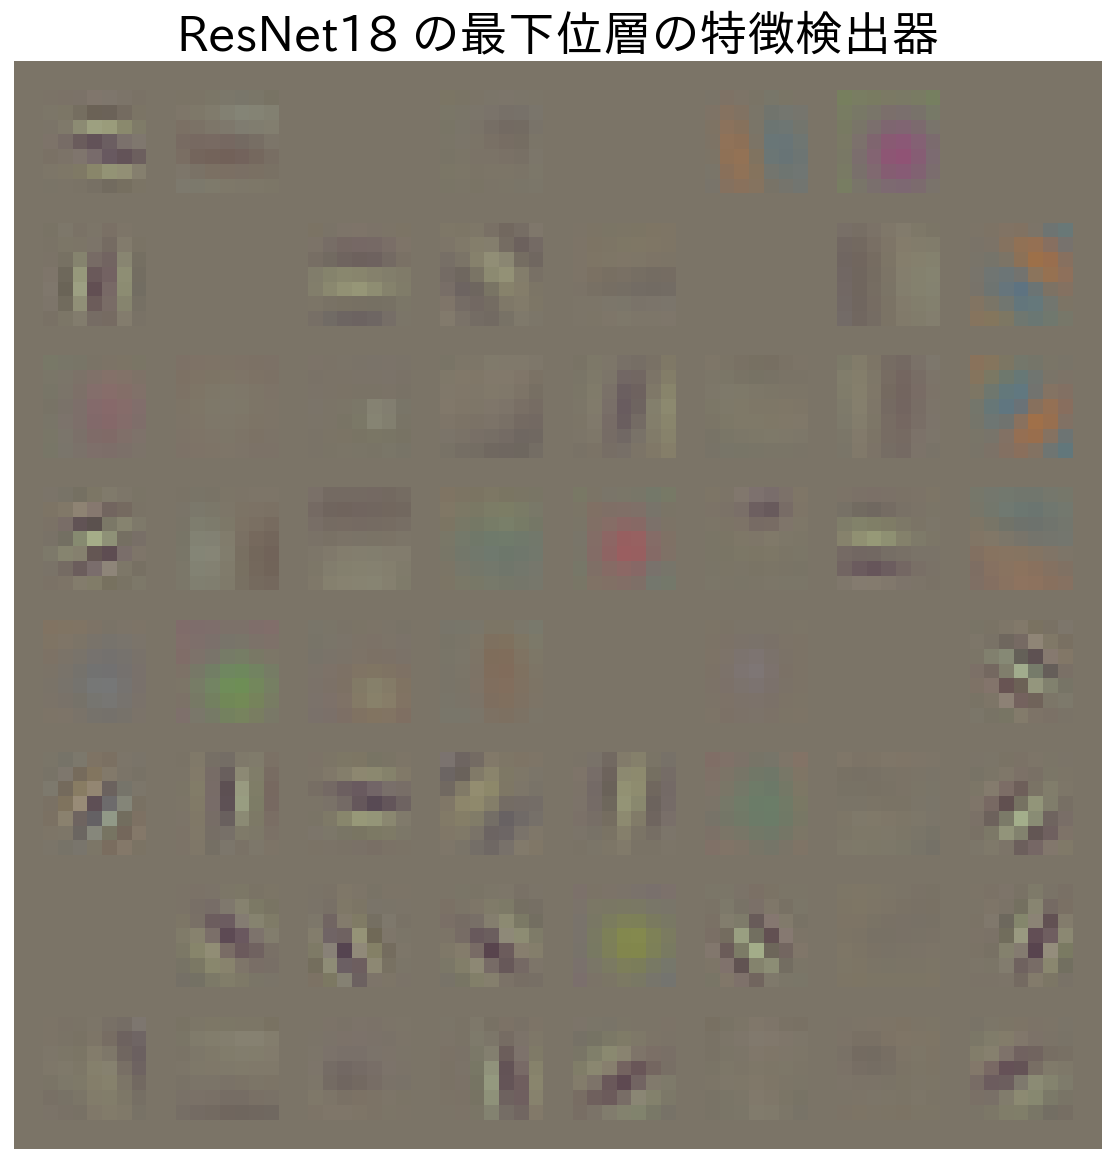

In [ ]:
# 上記の結果は，torch.Size([64, 3, 7, 7]) と表示されているはずです。
# これは，4 次元のデータで，以下のような意味になります。
# 64: 出力特徴数，
# 3: 入力特徴数

import torchvision 

def img_show(inp, title=None, figsize=(10,10), fontsize=24, **kwargs):
    """テンソルを画像として表示"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title, fontsize=fontsize)

# ResNet18
data = resnet.conv1.weight
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="ResNet18 の最下位層の特徴検出器")
plt.show()

In [ ]:
# AlexNet
alexnet = models.alexnet(pretrained=True)
#print(alexnet.named_modules)
data = alexnet.features[0].weight
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="AlexNet の最下位層の特徴検出器")
plt.show()

In [ ]:
# Inception_v3
net = models.inception_v3(pretrained=True)
data = net.Conv2d_1a_3x3.conv.weight
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="inception_v3 の最下位層の特徴検出器")
plt.show()

In [ ]:
# VGG11
net = models.vgg11(pretrained=True)
data = net.features[0].weight
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="VGG11 の最下位層の特徴検出器")
plt.show()

In [ ]:
# densenet121
net = models.densenet121(pretrained=True)
data = net.features.conv0.weight
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="densnett121 の最下位層の特徴検出器")
plt.show()

In [ ]:
# mobilenet_v2
net = models.mobilenet_v2(pretrained=True)
#print(net.named_modules) 
data = net.features[0][0].weight
#print(data.size())
out = torchvision.utils.make_grid(data)
img_show(out, figsize=(10,10), title="mobilenet の最下位層の特徴検出器")
plt.show()